[array([ 2.78777694e-07,  2.49118108e-07,  1.61372679e-07,  2.05926416e-08,
        -1.60777478e-07, -3.58442750e-07, -5.32857540e-07, -6.29002506e-07,
        -5.81129694e-07, -3.23394425e-07,  1.94072050e-07,  9.85815172e-07,
         2.01245628e-06,  3.16856557e-06,  4.28397572e-06,  5.14597200e-06,
         5.54925249e-06,  5.37886874e-06,  4.72855637e-06,  4.05313727e-06,
         4.34937633e-06,  7.35528932e-06,  1.57539787e-05,  3.33651707e-05,
         6.53062013e-05,  1.18104557e-04,  1.99746311e-04,  3.19648757e-04,
         4.88550895e-04,  7.18321588e-04,  1.02169157e-03,  1.41192135e-03,
         1.90242194e-03,  2.50634852e-03,  3.23618864e-03,  4.10336636e-03,
         5.11788162e-03,  6.28800060e-03,  7.62000904e-03,  9.11803528e-03,
         1.07839456e-02,  1.26173101e-02,  1.46154339e-02,  1.67734461e-02,
         1.90844370e-02,  2.15396342e-02,  2.41286069e-02,  2.68394894e-02,
         2.96592155e-02,  3.25737565e-02,  3.55683557e-02,  3.86277564e-02,
         4.1

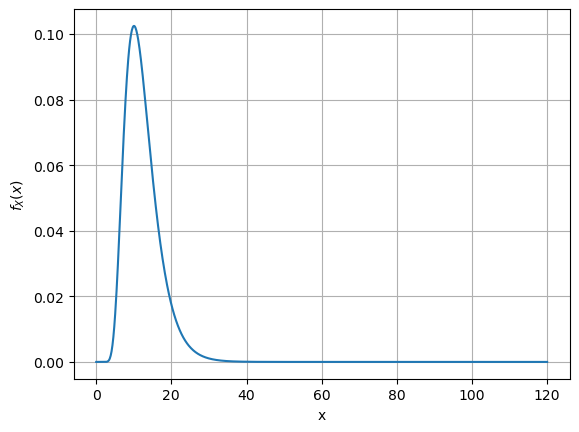

In [159]:
#first-hitting time COS method for Polynomial OU

"""
OU process first hitting time PDF using COS method
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.special import pbdv

from mpmath import mp
mp.dps = 10

#Rate of mean-reversion:
theta = 0.05
# long term mean:
mu = 28
# volatility:
sigma = 1
#initial value:
x_0 = 8
#upper barrier:
a = 8
L= 0
R= 120


#Polynomial Parameters
p_0 = 1
p_1 = 0.4
p_2 = -0.02
p_3 = 0.001

degree = 1

##############################
## only use this block when you need to compute density of T_b for b<x_0
## otherwise, comment this block of code
## use change of variable, so that the Laplace transoform can be used
"""
b = 8.
a = 2*x_0 - b
mu = 2*x_0 - mu
"""
##############################

def inv_poly(x,degree,p_1=p_1):
    if degree == 1:
        inv = (x- p_0) / p_1
    elif degree == 2:
        inv = 0.5 * (p_1/p_2) + np.sqrt((x/p_2) + 0.25*(p_1**2/p_2) - p_0)
    elif degree == 3:
        p = -(p_2/(3*p_3))
        q = p**3 + (p_2*p_1 - 3*p_3*(p_0-x)) / (6*p_3**2)
        r = p_1/(3*p_3)
        inv = p + np.cbrt(q + np.sqrt(q**2 + (r-p**2)**3)) + np.cbrt(q - np.sqrt(q**2 + (r-p**2)**3))
    return inv
    
def phi(u, x_0=x_0, mu=mu, sigma=sigma, a=a, theta=theta, p_1=p_1):
    y1 = ((mu - x_0) * np.sqrt(2*theta)) / sigma
    y2 = ((mu - inv_poly(a,degree, p_1=p_1)) * np.sqrt(2*theta)) / sigma
    exp_factor = np.exp((theta*(x_0-mu)**2 - theta*(inv_poly(a,degree, p_1=p_1) - mu)**2)/(2*sigma**2))
    v = mp.mpc(0., -u/theta)
    fn = exp_factor * (mp.pcfd(v, y1) / mp.pcfd(v, y2))
    return fn

    
def COSDensity(phi,x,N,R,L):
    sum = 0.
    for k in range(0, N):
        F_k = 2/(R-L)*np.real(phi(k*np.pi/(R-L)) * np.exp(-((L*k*np.pi)/(R-L)) * 1j))
        F_k = np.real(complex(F_k))
        if k == 0:
            F_k = 0.5 * F_k
        else:
            F_k = F_k
        F_k = F_k *np.exp(np.log(10**(-16))*(k/N)**6)
        sum += F_k * np.cos(k * np.pi * (x - L)/(R-L))
    return sum

def mainCalculation():
    j = complex(0.0, 1.0) #assigning j=sqrt(-1)

    # Define the range for the expansion points
    N = [2**x for x in range(8,9,1)]

    # Define the domain for density
    x = np.linspace(L,R,1000)
    
    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    f_X_list = []
    for n in N:
        f_X = COSDensity(phi,x,n,R,L)
        f_X_list.append(f_X)
        plt.plot(x,f_X)
    return f_X_list
    

mainCalculation()   



    
    



    



Expected value of first hitting times:  25.326198000000034
Variance of first hitting times:  614.2588661628046
Variance of first hitting times: 614.2518341033417


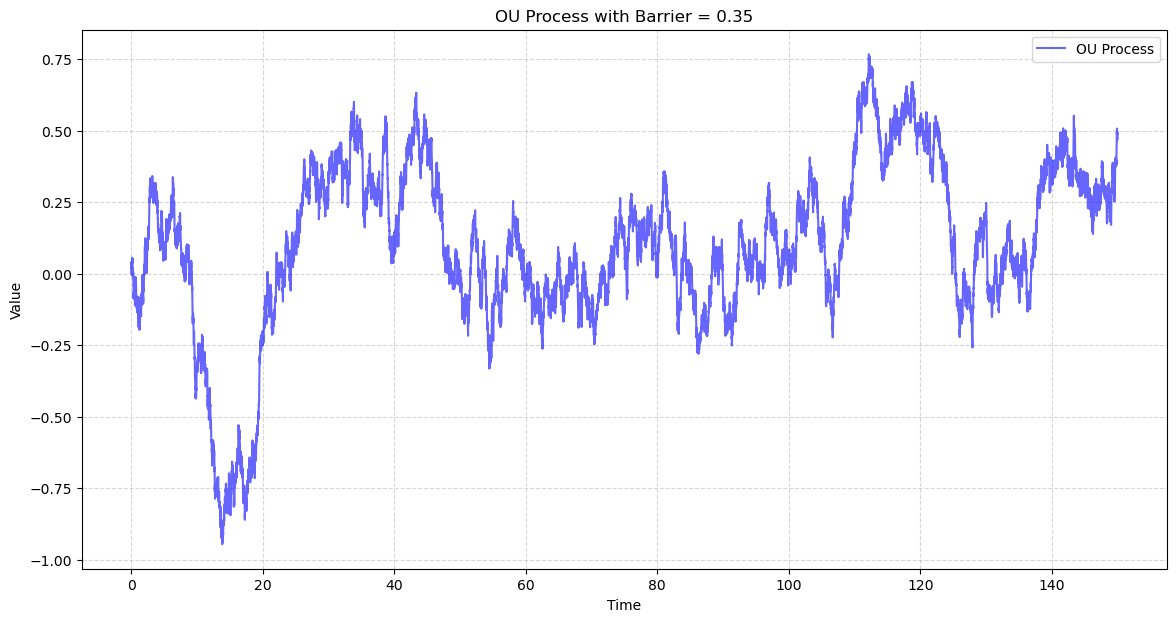

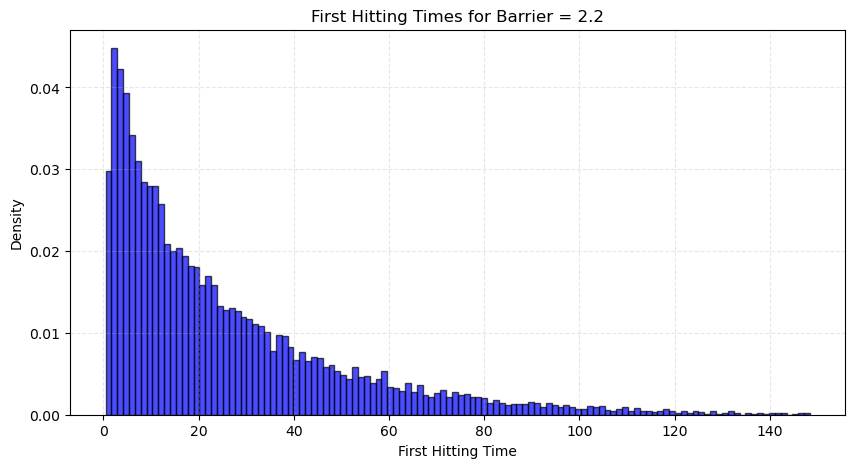

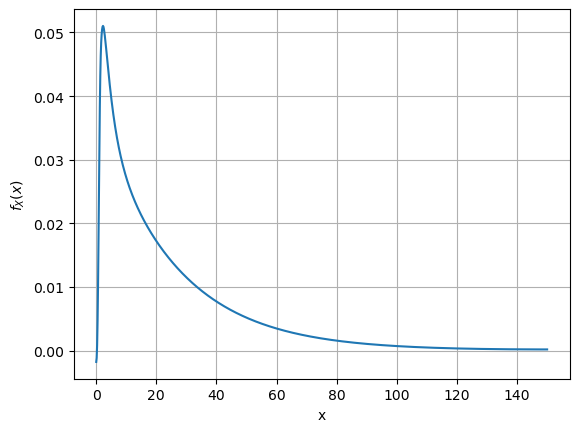

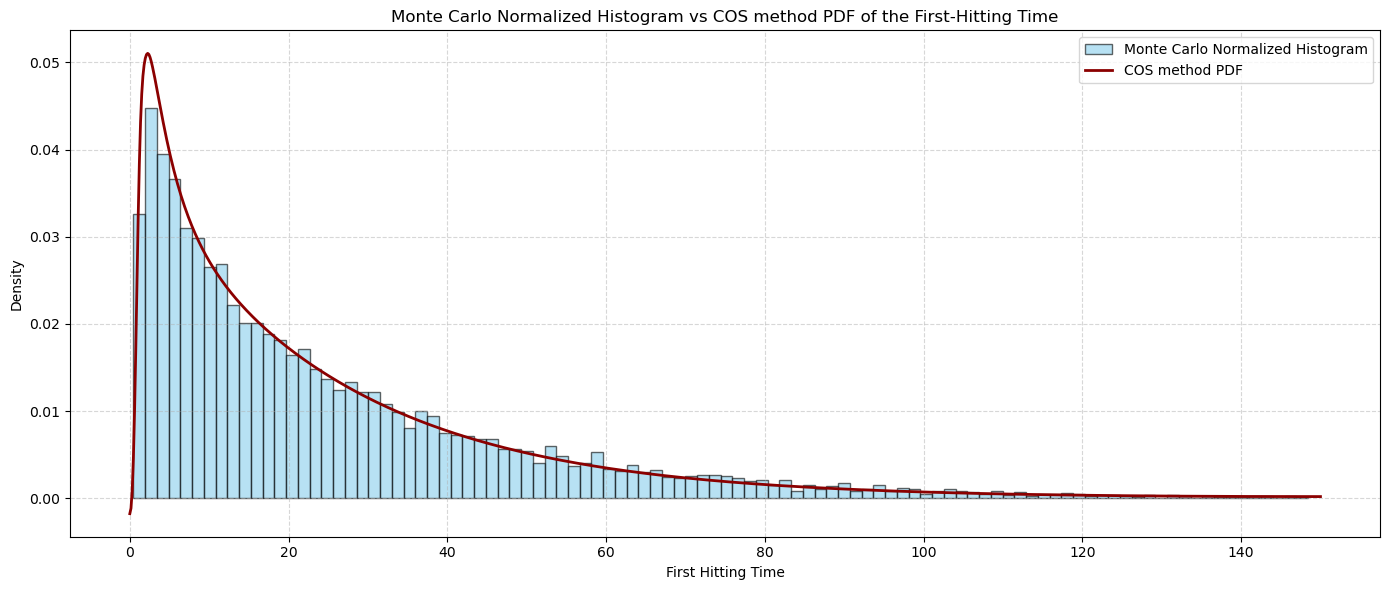

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


#Parameters:

#Rate of mean-reversion:
theta = 0.2
# long term mean:
mu = 0
# volatility:
sigma = 0.15
#initial value:
x_0 = 0
#first hitting barrier:
barrier = 2.2

#Polynomial Parameters
p_0 = 2
p_1 = 0.6
p_2 = -0.5
p_3 = 1
degree = 3

T = 150                                # simulation length
m = 15000                                 # number of timepoints
time_points = np.linspace(0, T, m + 1)  # time grid

def inv_poly(x,degree):
    if degree == 1:
        inv = (x- p_0) / p_1
    elif degree == 2:
        inv = 0.5 * (p_1/p_2) + np.sqrt((x/p_2) + 0.25*(p_1**2/p_2) - p_0)
    elif degree == 3:
        p = -(p_2/(3*p_3))
        q = p**3 + (p_2*p_1 - 3*p_3*(p_0-x)) / (6*p_3**2)
        r = p_1/(3*p_3)
        inv = p + np.cbrt(q + np.sqrt(q**2 + (r-p**2)**3)) + np.cbrt(q - np.sqrt(q**2 + (r-p**2)**3))
    return inv


def simulate_POLY_OU_process(theta, mu, sigma, x_0, T, m, n_paths,p_0, p_1, p_2, p_3):
    dt = T / m

    #initialize paths
    OU_paths = np.zeros((n_paths, m + 1))
    POLY_OU_paths = np.zeros((n_paths, m + 1))
    OU_paths[:,0] = x_0
    POLY_OU_paths[:, 0] =  p_0 + p_1 * x_0 + p_2 * x_0**2 + p_3 * x_0**3

    # Generate all random shocks upfront (size: n_paths × m)
    dW = np.sqrt(dt) * np.random.normal(0, 1, size=(n_paths, m))
    
    for j in range(m):
        OU_next = OU_paths[:, j] + theta * (mu - OU_paths[:, j]) * dt + sigma * dW[:, j]
        OU_paths[:, j + 1] = OU_next
        POLY_OU_paths[:, j + 1] = p_0 + p_1 * OU_next + p_2 * OU_next**2 + p_3 * OU_next**3
    
    return POLY_OU_paths, OU_paths 


# Simulate multiple paths
n_paths = 10000


poly_ou_paths, ou_paths = simulate_POLY_OU_process(theta, mu, sigma, x_0, T, m, n_paths, p_0, p_1, p_2, p_3)

def compute_first_hitting_times(paths, b, n_paths):
    hitting_times = []
    
    for i in range(n_paths):
        hit_index = []
        for j in range (m):
            if paths[i, j] >= barrier:
                hit_index.append((j/m)*T)
        if len(hit_index) > 0:
            hitting_times.append(hit_index[0])  # Store first hitting time
        
    return np.array(hitting_times)

# Compute first hitting times
hitting_times = compute_first_hitting_times(poly_ou_paths, barrier, n_paths)

#computing average first hitting time
expected_value = sum(hitting_times)/ n_paths
print("Expected value of first hitting times: ", expected_value)

#computing variance of first hitting time
variance = sum((hitting_times - expected_value) ** 2) / (len(hitting_times) - 1)

print("Variance of first hitting times: ", variance)

variance = np.var(hitting_times, ddof=1)  # Using ddof=1 for sample variance
print("Variance of first hitting times:", variance)


# Plot first 5 OU paths and their polynomial transforms
plt.figure(figsize=(14, 7))

for i in range(min(1, n_paths)):
    plt.plot(time_points, ou_paths[i], 'b-', alpha=0.6, label='OU Process' if i == 0 else "")
    #plt.plot(time_points, poly_ou_paths[i], 'r--', alpha=0.6, label='Polynomial Process' if i == 0 else "")

#plt.axhline(barrier, color='k', linestyle='--', label=f'Barrier at {barrier}')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("OU Process with Barrier = 0.35")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Histogram of hitting times (if any paths hit the barrier)
if len(hitting_times) > 0:
    plt.figure(figsize=(10, 5))
    plt.hist(hitting_times, bins=120, density=True, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel("First Hitting Time")
    plt.ylabel("Density")
    plt.title(f"First Hitting Times for Barrier = {barrier}")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()
else:
    print("No paths hit the barrier; no histogram generated.")

#first-hitting time COS method for Polynomial OU

"""
OU process first hitting time PDF using COS method
"""

from scipy.special import pbdv

from mpmath import mp
mp.dps = 10

#upper barrier:
a = 2.2
L= 0
R= 150


#Polynomial Parameters
p_0 = 2
p_1 = 0.6
p_2 = -0.5
p_3 = 1

degree = 3

##############################
## only use this block when you need to compute density of T_b for b<x_0
## otherwise, comment this block of code
## use change of variable, so that the Laplace transoform can be used
#s_0 = p_0 + p_1*x_0 + p_2*x_0**2 + p_3*x_0**3
"""
b = 10.5
a = 2*x_0 - b
mu = 2*x_0 - mu
"""
##############################

def inv_poly(x,degree,p_1=p_1):
    if degree == 1:
        inv = (x- p_0) / p_1
    elif degree == 2:
        inv = 0.5 * (p_1/p_2) + np.sqrt((x/p_2) + 0.25*(p_1**2/p_2) - p_0)
    elif degree == 3:
        p = -(p_2/(3*p_3))
        q = p**3 + (p_2*p_1 - 3*p_3*(p_0-x)) / (6*p_3**2)
        r = p_1/(3*p_3)
        inv = p + np.cbrt(q + np.sqrt(q**2 + (r-p**2)**3)) + np.cbrt(q - np.sqrt(q**2 + (r-p**2)**3))
    return inv
    
def phi(u, x_0=x_0, mu=mu, sigma=sigma, a=a, theta=theta, p_1=p_1):
    y1 = ((mu - x_0) * np.sqrt(2*theta)) / sigma
    y2 = ((mu - inv_poly(a,degree, p_1=p_1)) * np.sqrt(2*theta)) / sigma
    exp_factor = np.exp((theta*(x_0-mu)**2 - theta*(inv_poly(a,degree, p_1=p_1) - mu)**2)/(2*sigma**2))
    v = mp.mpc(0., -u/theta)
    fn = exp_factor * (mp.pcfd(v, y1) / mp.pcfd(v, y2))
    return fn

    
def COSDensity(phi,x,N,R,L):
    sum = 0.
    for k in range(0, N):
        F_k = 2/(R-L)*np.real(phi(k*np.pi/(R-L)) * np.exp(-((L*k*np.pi)/(R-L)) * 1j))
        F_k = np.real(complex(F_k))
        if k == 0:
            F_k = 0.5 * F_k
        else:
            F_k = F_k
        F_k = F_k *np.exp(np.log(10**(-16))*(k/N)**6)
        sum += F_k * np.cos(k * np.pi * (x - L)/(R-L))
    return sum

def mainCalculation():
    j = complex(0.0, 1.0) #assigning j=sqrt(-1)

    # Define the range for the expansion points
    N = [2**x for x in range(9,10,1)]

    # Define the domain for density
    x = np.linspace(L,R,1000)
    
    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    
    for n in N:
        f_X = COSDensity(phi,x,n,R,L)
        plt.plot(x,f_X)
    return f_X
    

f_X = mainCalculation()   
x = np.linspace(L,R,1000)
       
plt.figure(figsize=(14, 6))

# Histogram (density=True to normalize)
plt.hist(hitting_times, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Monte Carlo Normalized Histogram')

# COS PDF
plt.plot(x, f_X, color='darkred', lw=2, label='COS method PDF')

plt.xlabel("First Hitting Time")
plt.ylabel("Density")
plt.title("Monte Carlo Normalized Histogram vs COS method PDF of the First-Hitting Time")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


    


